# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Varun Chandra Shekar
#### Student ID: s4017549

Date: 15 April 2024

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* difflib
* matplotlib
* seaborn
* ElementTree

## Introduction
In this assessment, I first parsed the data(xml) using the ElementTree library, I used a for loop to access the tags in the tree and stored the values in a dictionary which in turn I used to convert it to a dataframe.
I then started to analyse the data using differnt functions in pandas such as shape, columns, head, tail, value_counts to understand the given data. After doing so I started to analyse each columns in the data to clean the errors that were present. 
1) **ID column:** I encoutered that there was a duplicate column, I did not do any changes to that column because that ID was generated from two different sources, so if we try to alter it, a user might find it difficult to find that listing in that particular source website. I also changed the data type from object to integer.
2) **Location column:** I found problems in the Location column, there were certain values that were mispelled, so I used regex to find the nearest spelling to the error and replaced that value with it. 
3) **Company column:** I found problems in the Company column, I found missing values using the isnull() function, I replaced these values as 'non-specified' as mentioned in the assignment specification.
4) **ContractType column:** I found problems in the ContractType column, I found missing values using the isnull() function, I replaced these values as 'non-specified' as mentioned in the assignment specification.
5) **ContractTime column:** I found problems in the ContractTime column, I found missing values using the isnull() function, I replaced these values as 'non-specified' as mentioned in the assignment specification.
6) **Salary column:** I faced multiple issues while handling the data, I found that there were multiple non-digit characters, I found them using the regex pattern, I removed the non digit values which were present. I found that there were multiple values with range given, I replaced those values by taking the average of both the values, I found there were missing values, I replaced the missing values by calculating the mean of each category and replaced them respectively. Next I found there were outliers, by using the IQR method, later I ploted a scatter plot to give a graphical visualisation of the outliers, I later replaced the outliers with the mean of the respective categories. I did not handle the cases of values that were in per hour because there is ContractType column which tells the users whether it's part time or full time, the decimal values are associated to part time, so people can filter it easily. In the end I converted the data type to float.
6) **OpenDate and CloseDate column:** I first converted them into DateTime format, I later found out that there were certain integrity violations, where the closedate was first and the opendate was later, so I have assumed it has a data entry error and swapped the respective values.
- In the end I saved the cleaned dataframe into a csv file.

## Importing libraries 

In [3]:
#I am importing all the required libraries
import xml.etree.ElementTree as etree
import pandas as pd
import numpy as np
import re
import difflib
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1. Parsing Data

### 1.1. Examining and loading data

In [6]:
#I am parsing the XML file and storing it in a variable tree and extracting the root using the getroot()function.
tree = etree.parse("s4017549_dataset1.xml")
root = tree.getroot()

In [7]:
#Getting the tag of the XML:
root.tag

'JobAds'

### 1.2 Parsing data into the required format

In [9]:
# Code to parse data
#I am extracting all the tags in a dictionary and I have used a list to append the data into one data structures, 
datal = []
#I have used the for loop to access the first tag: Source, which contains two tags Source name and JobAd.
for source in root.findall('.//Source'):
    source_name = source.find('SourceName').text if source.find('SourceName') is not None else None
    #I have used the second for loop to access the JobAd tag and I am storing all the extracted values in dictionary.
    for jobad in source.findall('.//JobAd'):
        datal.append({
            'Id': jobad.find('Id').text if jobad.find('Id') is not None else None,
            'Title': jobad.find('Title').text if jobad.find('Title') is not None else None,
            'Location': jobad.find('Location').text if jobad.find('Location') is not None else None,
            'Company': jobad.find('Company').text if jobad.find('Company') is not None else None,
            'ContractType': jobad.find('ContractType').text.strip() if jobad.find('ContractType') is not None and jobad.find('ContractType').text.strip() else None,
            'ContractTime': jobad.find('ContractTime').text.strip() if jobad.find('ContractTime') is not None and jobad.find('ContractTime').text.strip() else None,
            'Category': jobad.find('Category').text if jobad.find('Category') is not None else None,
            'Salary': jobad.find('Salary').text if jobad.find('Salary') is not None else None,
            'OpenDate': jobad.find('.//OpenDate').text if jobad.find('.//OpenDate') is not None else None,
            'CloseDate': jobad.find('.//CloseDate').text if jobad.find('.//CloseDate') is not None else None,
            'SourceName': source_name
        })

In [10]:
#Converting XML into dataframe:
dfjob = pd.DataFrame(datal)
#I have named the index column as ID for easy reference
dfjob.index.name = 'ID'
dfjob.head(5)

Id                                      Title     Location  \
ID                                                                     
0   69747285                   Science Teacher  Sundays  West London   
1   69022397                IT Support/Rollout Engineer    Sheffield   
2   69932721  Electronics Reliability Analysis Engineer           UK   
3   67019364             Project / Planning Coordinator          Ely   
4   67903542         Solutions Architect CCNP CCIP CCIE      Reading   

                     Company ContractType ContractTime          Category  \
ID                                                                         
0            Trust Education    part_time          N/A     Teaching Jobs   
1        Matchtech Group Plc          N/A     contract           IT Jobs   
2   Innovate Recruitment Ltd          N/A    permanent  Engineering Jobs   
3             i4 Recruitment          N/A    permanent  Engineering Jobs   
4        JAM Recruitment Ltd          N/A    permanent           IT Jobs   

   Salary         OpenDate        CloseDate        SourceName  
ID                                                             
0   25400  20120917T150000  20121017T150000  cv-library.co.uk  
1   14400  20130927T000000  20131027T000000  cv-library.co.uk  
2   29000  20121115T120000  20130213T120000  cv-library.co.uk  
3   21500  20120426T150000  20120625T150000  cv-library.co.uk  
4   55000  20131219T150000  20140217T150000  cv-library.co.uk

In [11]:
#Shape of the dataframe:
dfjob.shape

(50703, 11)

In [12]:
#I am printing the different column names that are available in the dataset.
dfjob.columns

Index(['Id', 'Title', 'Location', 'Company', 'ContractType', 'ContractTime',
       'Category', 'Salary', 'OpenDate', 'CloseDate', 'SourceName'],
      dtype='object')

In [13]:
#Head of the dataframe
dfjob.head(5)

Id                                      Title     Location  \
ID                                                                     
0   69747285                   Science Teacher  Sundays  West London   
1   69022397                IT Support/Rollout Engineer    Sheffield   
2   69932721  Electronics Reliability Analysis Engineer           UK   
3   67019364             Project / Planning Coordinator          Ely   
4   67903542         Solutions Architect CCNP CCIP CCIE      Reading   

                     Company ContractType ContractTime          Category  \
ID                                                                         
0            Trust Education    part_time          N/A     Teaching Jobs   
1        Matchtech Group Plc          N/A     contract           IT Jobs   
2   Innovate Recruitment Ltd          N/A    permanent  Engineering Jobs   
3             i4 Recruitment          N/A    permanent  Engineering Jobs   
4        JAM Recruitment Ltd          N/A    permanent           IT Jobs   

   Salary         OpenDate        CloseDate        SourceName  
ID                                                             
0   25400  20120917T150000  20121017T150000  cv-library.co.uk  
1   14400  20130927T000000  20131027T000000  cv-library.co.uk  
2   29000  20121115T120000  20130213T120000  cv-library.co.uk  
3   21500  20120426T150000  20120625T150000  cv-library.co.uk  
4   55000  20131219T150000  20140217T150000  cv-library.co.uk

In [14]:
#I am printing the tail of the dataframe.
dfjob.tail(5)

Id                                         Title  \
ID                                                              
50698  69090336                  Non Production Asset Manager   
50699  69090173                     Trading Book Data Analyst   
50700  66372417            Graduate Engineer (Water industry)   
50701  70139229  Health & Social Care Tutor/Assessor  Bristol   
50702  72342177                   Head of Estates Maintenance   

                Location                   Company ContractType ContractTime  \
ID                                                                             
50698       Peterborough  Omega Resource Group Ltd         None    permanent   
50699             London                     Hays          None     contract   
50700  South Lanarkshire   Carrington West Limited    full_time     contract   
50701                 UK      Pursuit Training Ltd         None    permanent   
50702             London      Finegreen Associates          N/A     contract   

                        Category Salary         OpenDate        CloseDate  \
ID                                                                          
50698           Engineering Jobs  33500  20120420T150000  20120619T150000   
50699  Accounting & Finance Jobs  48000  20120520T150000  20120619T150000   
50700           Engineering Jobs  20000  20130119T000000  20130419T000000   
50701              Teaching Jobs  18000  20120811T000000  20121010T000000   
50702  Healthcare & Nursing Jobs  50599  20130131T000000  20130214T000000   

               SourceName  
ID                         
50698  legalprospects.com  
50699  legalprospects.com  
50700   thegraduate.co.uk  
50701      cvjobstore.com  
50702         hsjjobs.com

......

## Task 2. Auditing and cleansing the loaded data

In [17]:
#I am checking the missing values that are present using the isnull() function.
dfjob.isnull().sum()

Id                  0
Title               0
Location            0
Company          3379
ContractType    18766
ContractTime    11028
Category            0
Salary            764
OpenDate            0
CloseDate           0
SourceName          0
dtype: int64

In [18]:
#I am checking the data type of each column using the dtypes function.
dfjob.dtypes

Id              object
Title           object
Location        object
Company         object
ContractType    object
ContractTime    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object

### Cleaning Data
I have created subsections of each column of the data, where I am cleaning the data and I am recording the error log for the same.

#### 1) ID Column

In [21]:
#I am checking the unique values that are present in the ID column to check for duplicate values using value_counts() function.
dfjob['Id'].value_counts().sort_values(ascending = False)

Id
69854693    2
65198956    1
67895520    1
64828809    1
69932721    1
           ..
69090081    1
67383954    1
69090095    1
69090336    1
72342177    1
Name: count, Length: 50702, dtype: int64

In [297]:
#I am printing the values which have the same ID
mrows = dfjob[dfjob['Id'] == 69854693]
if not mrows.empty:
    for i, r in mrows.iterrows():
        print(r)

In [23]:
#Error Logging
#I have written a function to record the errors based on the columns that was provided in the assignment description,
#I am storing the values in the dictionary to make it more presentable and later convert it to a CSV file.
itemlist = ['indexOfdf','ColumnName','Original','Modified','ErrorType','Fixing']
erlist = pd.DataFrame(columns = itemlist)

#I am updating the columns by using the function that I have created
def updateErlist(indexOfdf, ColumnName, Original, Modified, ErrorType, Fixing):
    errItem = [indexOfdf,ColumnName,Original,Modified,ErrorType,Fixing]
    erlist.loc[len(erlist)]=errItem   

#I have copied the dataframe to another dataframe to compare the old and new values that has changed
dfjob_copy = dfjob.copy() 

In [24]:
#Updating the error log of duplicate ID:
updateErlist('(42853,50677)','Id,','69854693','Not Modified','Duplicate','I am not changing the values because the ID is from two different sources.')

In [25]:
#I am checking for null values in the ID column:
dfjob['Id'].isnull().sum()

0

In [26]:
#Checking the data type of the column.
dfjob['Id'].dtype

dtype('O')

In [27]:
#I am converting it into a integer format.
dfjob['Id'] = dfjob['Id'].astype(int)
dfjob['Id'].dtype

dtype('int64')

In [28]:
#Error loging the data type conversion of the ID column.
updateErlist('ALL','Id,','ObjectType','IntegerType','Wrong Data Type','Converted the data type from object to integer because the ID column is a 8 digit number.')

In [29]:
#Printing the error list.
erlist

indexOfdf ColumnName    Original      Modified        ErrorType  \
0  (42853,50677)        Id,    69854693  Not Modified        Duplicate   
1            ALL        Id,  ObjectType   IntegerType  Wrong Data Type   

                                              Fixing  
0  I am not changing the values because the ID is...  
1  Converted the data type from object to integer...

#### 2) Title Column

In [31]:
#I am checking the different values that are present in the title column.
dfjob['Title'].value_counts()

Title
Commercial Burner Engineer                                  2
Finance Business Partner                                    2
SYSTEM TESTER  Join a Leading Fund Manager  ****K, Essex    2
Science Teacher  Sundays                                    1
Java Ecommerce Developer  Permanent  Basingstoke            1
                                                           ..
Staff Nurse  Dorking  Dorking                               1
Qualified Nurses  Exeter and Plymouth  Exeter               1
Community Nurse  Leicester                                  1
Deputy Home Manager RGN  Preston                            1
Head of Estates Maintenance                                 1
Name: count, Length: 50700, dtype: int64

In [32]:
#I am checking the null values that are present in the title column.
dfjob['Title'].isnull().sum()

0

#### 3) Location

In [34]:
#I am checking the different values that are present in the loction column.
dfjob['Location'].value_counts().tail(15)

Location
Potters Bar         9
Chipping Campden    8
Petersfield         8
Oldbury             8
North Finchley      7
Leads               2
Oxfords             2
london              2
HAMpshire           1
birmingham          1
ABERDEEN            1
BRISTOL             1
Livepool            1
Manchaster          1
Cembridge           1
Name: count, dtype: int64

In [35]:
#I have identified few cases where the spelling of the location, 
#hence I am using difflib to identify the nearest spelling and changing it.
#I am first converting the lower case:
dfjob['Location'] = dfjob['Location'].str.lower()

In [36]:
#I have written the copy code to record the error log of the location column
dfjobl = dfjob.copy()

In [37]:
#Solving the "leads" typo error:
difflib.get_close_matches('leads',set(dfjob['Location']).difference(['leads']),n=1)

['leeds']

In [38]:
#Solving the "Cembridge" typo error:
difflib.get_close_matches('cembridge',set(dfjob['Location']).difference(['cembridge']),n=1)

['cambridge']

In [39]:
#Solving the "Livepool" typo error:
difflib.get_close_matches('livepool',set(dfjob['Location']).difference(['livepool']),n=1)

['liverpool']

In [40]:
#Solving the "manchaster" typo error:
difflib.get_close_matches('manchaster',set(dfjob['Location']).difference(['manchaster']),n=1)

['manchester']

In [41]:
#Solving the "oxfords" typo error:
difflib.get_close_matches('oxfords',set(dfjob['Location']).difference(['oxfords']),n=1)

['oxford']

In [42]:
#I am creating a missing dictionary and assigning the corrected values as found above:
correcteddi = {'leads':'leeds','cembridge':'cambridge',
               'livepool':'liverpool','manchaster':'manchester',
               'oxfords':'oxford'}
#I am using the replace function to replace the errors that has to be corrected.
dfjob['Location'].replace(correcteddi, inplace = True)

In [43]:
#Error logging for Location Column.
ll = []
for i in dfjob.index:
    original = dfjobl.loc[i,'Location']
    modified = dfjob.loc[i, 'Location']
    if original != modified:
        ll.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) 
        updateErlist(i,'Company',original,modified,'Misspelling',reason) 
        
ldf = pd.DataFrame(ll)
print(ldf)

   Index Before Change After Change
0    351     cembridge    cambridge
1  16024       oxfords       oxford
2  17073         leads        leeds
3  17387      livepool    liverpool
4  36913    manchaster   manchester
5  45499       oxfords       oxford
6  46137         leads        leeds


In [44]:
#Checking the value of error list:
erlist

indexOfdf ColumnName    Original      Modified        ErrorType  \
0  (42853,50677)        Id,    69854693  Not Modified        Duplicate   
1            ALL        Id,  ObjectType   IntegerType  Wrong Data Type   
2            351    Company   cembridge     cambridge      Misspelling   
3          16024    Company     oxfords        oxford      Misspelling   
4          17073    Company       leads         leeds      Misspelling   
5          17387    Company    livepool     liverpool      Misspelling   
6          36913    Company  manchaster    manchester      Misspelling   
7          45499    Company     oxfords        oxford      Misspelling   
8          46137    Company       leads         leeds      Misspelling   

                                              Fixing  
0  I am not changing the values because the ID is...  
1  Converted the data type from object to integer...  
2                     Changed cembridge to cambridge  
3                          Changed oxfords to oxford  
4                             Changed leads to leeds  
5                      Changed livepool to liverpool  
6                   Changed manchaster to manchester  
7                          Changed oxfords to oxford  
8                             Changed leads to leeds

In [45]:
dfjob['Location'].value_counts().tail(15)

Location
canary wharf         10
st. neots            10
tadworth             10
lewisham             10
lutterworth           9
gatwick               9
waterlooville         9
st. ives              9
thorpe st. andrew     9
potters bar           9
grimsby               9
chipping campden      8
oldbury               8
petersfield           8
north finchley        7
Name: count, dtype: int64

In [46]:
#I am capitalising the first letter of the value:
dfjob['Location'] = dfjob['Location'].str.title()

In [47]:
dfjob['Location'].value_counts()

Location
Uk                   7622
London               6609
South East London    2687
The City             1129
Central London        830
                     ... 
Grimsby                 9
Chipping Campden        8
Oldbury                 8
Petersfield             8
North Finchley          7
Name: count, Length: 479, dtype: int64

#### 4) Company Column

In [49]:
#Checking the different values that are present in the company column:
dfjob['Company'].value_counts()

Company
-                         1235
                           549
UKStaffsearch              434
Randstad                   368
CVbrowser                  309
                          ... 
THEWGC                       1
Hewitts Consulting Ltd       1
Abingdon                     1
Provide Consulting Ltd       1
Pursuit Training Ltd         1
Name: count, Length: 8673, dtype: int64

In [50]:
#Checking for null values that are present in the company column:
dfjob['Company'].isnull().sum()

3379

In [51]:
#Replacing the null values with 'non-specified'
dfjob['Company'] = dfjob['Company'].fillna('non-specified')

In [52]:
dfjob['Company'].isnull().sum()

0

In [53]:
#Checking for different inconsistent values in the column:
#1)'.'
dfjob[dfjob['Company'] == '.'].value_counts().sum()

1

In [54]:
#2)'-'
dfjob[dfjob['Company'] == '-'].value_counts().sum()

1235

In [55]:
#Replacing inconsistent values as ' ','-','.' to non-specified
dfjob['Company'] = dfjob['Company'].replace(['-','.'],'non-specified')

In [56]:
#Error logging for Company Column.
cl = []
for i in dfjob.index:
    original = dfjob_copy.loc[i,'Company']
    modified = dfjob.loc[i, 'Company']
    if original != modified:
        cl.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) 
        updateErlist(i,'Company',original,modified,'Missing Values',reason) 
        
changedf = pd.DataFrame(cl)
print(changedf)

      Index Before Change   After Change
0     11148          None  non-specified
1     11154          None  non-specified
2     11157          None  non-specified
3     11161          None  non-specified
4     11165          None  non-specified
...     ...           ...            ...
4610  50421          None  non-specified
4611  50685             -  non-specified
4612  50686             -  non-specified
4613  50687             -  non-specified
4614  50688             -  non-specified

[4615 rows x 3 columns]


In [57]:
#Checking if the value is added to the erlist:
erlist.shape

(4624, 6)

In [58]:
#Checking if the value is correctly added:
erlist.tail()

indexOfdf ColumnName Original       Modified       ErrorType  \
4619     50421    Company     None  non-specified  Missing Values   
4620     50685    Company        -  non-specified  Missing Values   
4621     50686    Company        -  non-specified  Missing Values   
4622     50687    Company        -  non-specified  Missing Values   
4623     50688    Company        -  non-specified  Missing Values   

                             Fixing  
4619  Changed None to non-specified  
4620     Changed - to non-specified  
4621     Changed - to non-specified  
4622     Changed - to non-specified  
4623     Changed - to non-specified

In [59]:
#I am stripping the white spaces that are present in the company column using strip() function.
dfjob['Company'] = dfjob['Company'].str.strip()

In [60]:
dfjob['Company'].value_counts()

Company
non-specified               4615
                             549
UKStaffsearch                434
Randstad                     368
CVbrowser                    309
                            ... 
Cartridge Save                 1
University of Birmingham       1
Twinings                       1
Work Clever Recruitment        1
Pursuit Training Ltd           1
Name: count, Length: 8631, dtype: int64

#### 5) ContractType Column

In [62]:
#I am checking for unique values that are present in the column:
dfjob['ContractType'].unique()

array(['part_time', 'N/A', '-', 'full_time', None], dtype=object)

In [63]:
#I am checking for null values:
dfjob['ContractType'].isnull().sum()

18766

In [64]:
#I am filling the NA values with 'non-specified'
dfjob['ContractType'] = dfjob['ContractType'].fillna('non-specified')

In [65]:
dfjob['ContractType'].isnull().sum()

0

In [66]:
#Correcting values such as 'N/A','-' to 'non-specified'
dfjob['ContractType'] = dfjob['ContractType'].replace(['N/A', '-'], 'non-specified')

In [67]:
#Error logging for Contract Type:
ctype = []
for i in dfjob.index:
    original = dfjob_copy.loc[i,'ContractType']
    modified = dfjob.loc[i, 'ContractType']
    if original != modified:
        ctype.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) 
        updateErlist(i,'ContractType',original,modified,'Missing Values',reason) 
        
ctypedf = pd.DataFrame(ctype)
print(ctypedf)

       Index Before Change   After Change
0          1           N/A  non-specified
1          2           N/A  non-specified
2          3           N/A  non-specified
3          4           N/A  non-specified
4          5           N/A  non-specified
...      ...           ...            ...
37431  50697          None  non-specified
37432  50698          None  non-specified
37433  50699          None  non-specified
37434  50701          None  non-specified
37435  50702           N/A  non-specified

[37436 rows x 3 columns]


In [68]:
#I am stripping the white spaces that are present in the ContractType column using strip() function.
dfjob['ContractType'] = dfjob['ContractType'].str.strip()

In [69]:
#Checking if the value is added to the erlist:
erlist.shape

(42060, 6)

In [70]:
#Checking if the value is correctly added:
erlist.tail()

indexOfdf    ColumnName Original       Modified       ErrorType  \
42055     50697  ContractType     None  non-specified  Missing Values   
42056     50698  ContractType     None  non-specified  Missing Values   
42057     50699  ContractType     None  non-specified  Missing Values   
42058     50701  ContractType     None  non-specified  Missing Values   
42059     50702  ContractType      N/A  non-specified  Missing Values   

                              Fixing  
42055  Changed None to non-specified  
42056  Changed None to non-specified  
42057  Changed None to non-specified  
42058  Changed None to non-specified  
42059   Changed N/A to non-specified

In [71]:
#Checking if only required values are present in the column:
dfjob['ContractType'].unique()

array(['part_time', 'non-specified', 'full_time'], dtype=object)

In [72]:
dfjob['ContractType'].value_counts()

ContractType
non-specified    37436
full_time        11752
part_time         1515
Name: count, dtype: int64

#### 6) ContractTime Column

In [74]:
#I am checking for the unique column values:
dfjob['ContractTime'].unique()

array(['N/A', 'contract', 'permanent', None, '-'], dtype=object)

In [75]:
dfjob['ContractTime'].value_counts()

ContractTime
permanent    30324
contract      5579
N/A           2519
-             1253
Name: count, dtype: int64

In [76]:
#I am checking for missing value using isnull() function.
dfjob['ContractTime'].isnull().sum()

11028

In [77]:
#Filling the missing values with 'non-specified'
dfjob['ContractTime'] = dfjob['ContractTime'].fillna('non-specified')

In [78]:
dfjob['ContractTime'].isnull().sum()

0

In [79]:
dfjob['ContractTime'].value_counts()

ContractTime
permanent        30324
non-specified    11028
contract          5579
N/A               2519
-                 1253
Name: count, dtype: int64

In [80]:
#Correcting values such as 'N/A','-' to 'non-specified'
dfjob['ContractTime'] = dfjob['ContractTime'].replace(['N/A', '-'], 'non-specified')

In [81]:
#Error logging for Contract Type:
cttype = []
for i in dfjob.index:
    original = dfjob_copy.loc[i,'ContractTime']
    modified = dfjob.loc[i, 'ContractTime']
    if original != modified:
        cttype.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) 
        updateErlist(i,'ContractType',original,modified,'Missing Values',reason) 
        
ctiypedf = pd.DataFrame(cttype)
print(ctiypedf)

       Index Before Change   After Change
0          0           N/A  non-specified
1         48           N/A  non-specified
2        129           N/A  non-specified
3        156           N/A  non-specified
4        175           N/A  non-specified
...      ...           ...            ...
14795  50557          None  non-specified
14796  50604          None  non-specified
14797  50637             -  non-specified
14798  50680          None  non-specified
14799  50691          None  non-specified

[14800 rows x 3 columns]


In [82]:
#I am checking the shape of the erlist to verify if the values are getting updated.
erlist.shape

(56860, 6)

In [83]:
dfjob['ContractTime'].value_counts()

ContractTime
permanent        30324
non-specified    14800
contract          5579
Name: count, dtype: int64

#### 7) Category Column

In [85]:
#Checking for differnt values that are present in the column:
dfjob['Category'].value_counts()

Category
IT Jobs                             13133
Healthcare & Nursing Jobs            8183
Engineering Jobs                     7202
Accounting & Finance Jobs            6802
Sales Jobs                           4743
Hospitality & Catering Jobs          4530
Teaching Jobs                        3558
PR, Advertising & Marketing Jobs     2552
Name: count, dtype: int64

In [86]:
#I am checking for missing values in the column:
dfjob['Category'].isnull().sum()

0

#### 8) Salary

In [88]:
#Checking for different values that are present in the Salary Column:
dfjob['Salary'].value_counts()

Salary
35000            1718
30000            1667
40000            1527
45000            1353
32500            1330
                 ... 
23050 - 25050       1
15460               1
43564               1
26000/year          1
53520               1
Name: count, Length: 3467, dtype: int64

In [89]:
#Checking for null values in the salary column:
dfjob['Salary'].isnull().sum()

764

In [90]:
#I am using Regex pattern to find out the non-digit values that are there within the salary with the help of lambda function
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]                    47685
['None']                764
['N/A']                 685
['.']                   405
[' ']                   380
['-']                   329
[' - ']                 100
[' to ']                100
['/year']               100
[' pa']                 100
['K']                    50
['.', ' per hour']        3
['.', ' p/h']             2
Name: count, dtype: int64

In [91]:
#Replacing the values which have characters:
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('K','000',x))
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('/year','',x))
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('pa','',x))
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('perhour','',x))
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('p/h','', x))
dfjob['Salary'] = dfjob['Salary'].apply(lambda x: re.sub('per hour','', x))

In [92]:
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]            47835
['None']        764
['N/A']         685
[' ']           480
['.']           405
['-']           329
[' - ']         100
[' to ']        100
['.', ' ']        5
Name: count, dtype: int64

In [93]:
#I have written a function to split the value of 'to', to replace it with mean of the range.
def avgsalary(salary_range):
    p = salary_range.split('to')
    if len(p) == 2:
        mins, maxs = map(int, p)
        avg = (mins + maxs)/2
        return avg
    else:
        return salary_range
       
dfjob['Salary'] = dfjob['Salary'].apply(avgsalary)

In [94]:
#Checking again if the values are replaced:
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]            47835
['None']        764
['N/A']         685
['.']           505
[' ']           480
['-']           329
[' - ']         100
['.', ' ']        5
Name: count, dtype: int64

In [95]:
#I am replacing '-' with missing values:
dfjob.loc[dfjob['Salary'].str.startswith('-'), 'Salary'] = None

In [96]:
#Checking again if the values are replaced:
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]            47835
['None']       1093
['N/A']         685
['.']           505
[' ']           480
[' - ']         100
['.', ' ']        5
Name: count, dtype: int64

In [97]:
#I have written a function to split the value of '-', to replace it with mean of the range.
def avgsalary(salary_range):
    p = salary_range.split('-')
    if len(p) == 2:
        mins, maxs = map(int, p)
        avg = (mins + maxs)/2
        return avg
    else:
        return salary_range
       
dfjob['Salary'] = dfjob['Salary'].apply(avgsalary)

In [98]:
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]            47835
['None']       1093
['N/A']         685
['.']           605
[' ']           480
['.', ' ']        5
Name: count, dtype: int64

In [99]:
#Noting all the errors I have made in Salary uptill this point, removing Non-Digit Characters.
sal = []
for i in dfjob.index:
    original = dfjob_copy.loc[i,'Salary']
    modified = dfjob.loc[i, 'Salary']        
    if original != modified:
        sal.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) 
        updateErlist(i,'Salary',original,modified,'Non Digit Characters in Salary',reason) 
        
saldf = pd.DataFrame(sal)
print(saldf)

      Index   Before Change After Change
0         5   23000 - 25000      24000.0
1         6  31500 to 33500      32500.0
2         8      32400/year        32400
3       480      35000/year        35000
4       512      29400/year        29400
...     ...             ...          ...
1543  50527            None         None
1544  50528            None         None
1545  50544            None         None
1546  50635               -         None
1547  50681               -         None

[1548 rows x 3 columns]


In [100]:
erlist.shape

(58408, 6)

In [101]:
#I am replacing the 'N/A' values has None
dfjob['Salary'] = dfjob['Salary'].replace('N/A', None)

In [102]:
dfjob['Salary'] = dfjob['Salary'].astype(str)
nondigit = dfjob['Salary'].apply(lambda x: re.findall(r'\D+', x))
nondigit.astype('str').value_counts()

Salary
[]            47835
['None']       1778
['.']           605
[' ']           480
['.', ' ']        5
Name: count, dtype: int64

In [103]:
#Checking the data type:
dfjob['Salary'].dtypes

dtype('O')

In [104]:
#I am converting the datatype to numeric value because the salary should be in integer format
dfjob['Salary'] = pd.to_numeric(dfjob['Salary'], errors='coerce')

In [105]:
dfjob['Salary'].isnull().sum()

2158

In [106]:
#I am calculating the mean of each category because we cannot take overall mean and replace it for all null values
means = dfjob.groupby('Category')['Salary'].mean().round(2)
print(means)

Category
Accounting & Finance Jobs           39750.24
Engineering Jobs                    33210.02
Healthcare & Nursing Jobs           30715.74
Hospitality & Catering Jobs         22393.35
IT Jobs                             43596.70
PR, Advertising & Marketing Jobs    32196.86
Sales Jobs                          27912.16
Teaching Jobs                       29271.99
Name: Salary, dtype: float64


In [107]:
#I have written the lambda function to replace the mean value 
dfjob['Salary'] = dfjob.apply(lambda row: means[row['Category']] if pd.isnull(row['Salary']) else row['Salary'], axis=1)

In [108]:
#logging the changed error:
sal = []
for i in dfjob.index:
    original = dfjob_copy.loc[i,'Salary']
    modified = dfjob.loc[i, 'Salary']        
    if original != modified:
        if pd.isna(original):
            sal.append({'Index': i, 'Before Change': original, 'After Change': modified})
            reason = 'Changed ' + str(original) + ' to ' + str(modified) 
            updateErlist(i,'Salary',original,modified,'Missing Values',reason) 
        
saldf = pd.DataFrame(sal)
print(saldf)

     Index Before Change  After Change
0    11140          None      22393.35
1    11174          None      30715.74
2    11207          None      39750.24
3    11230          None      30715.74
4    11293          None      43596.70
..     ...           ...           ...
759  50341          None      39750.24
760  50394          None      39750.24
761  50527          None      33210.02
762  50528          None      33210.02
763  50544          None      33210.02

[764 rows x 3 columns]


In [109]:
erlist.shape

(59172, 6)

In [110]:
#Converting the salary column values to float as per assignment specification.
dfjob['Salary'] = dfjob['Salary'].astype(float)

In [111]:
dfjob['Salary'].dtype

dtype('float64')

In [112]:
dfjob['Salary'].isnull().sum()

0

In [113]:
#but I am checking for each category because a general detection might cause discrepancy.
Q1 = dfjob.groupby('Category')['Salary'].transform(lambda x: x.quantile(0.25))
Q3 = dfjob.groupby('Category')['Salary'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
outlierms = ((dfjob['Salary'] < (Q1 - 1.5 * IQR)) | (dfjob['Salary'] > (Q3 + 1.5 * IQR)))
out = dfjob[outlierms]
outcatdf = pd.DataFrame(out)

In [114]:
#Total number of outliers based on category:
outcatdf.groupby('Category')['Salary'].count()

Category
Accounting & Finance Jobs       80
Engineering Jobs                53
Healthcare & Nursing Jobs      209
Hospitality & Catering Jobs     80
IT Jobs                        267
Sales Jobs                       1
Teaching Jobs                   23
Name: Salary, dtype: int64

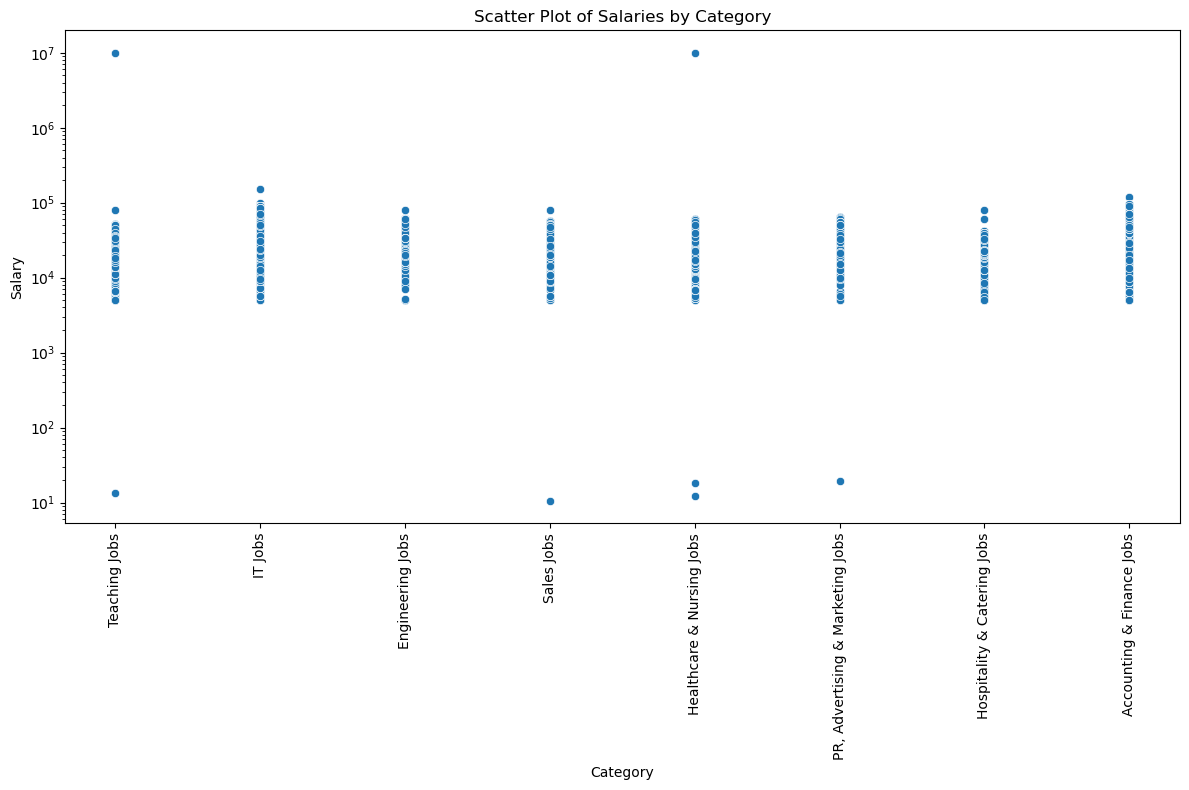

In [115]:
#I am plotting a scatter plot to show the outliers of different categories
plt.figure(figsize=(12,8))
sns.scatterplot(x='Category', y = 'Salary', data = dfjob)
plt.yscale('log')
plt.xticks(rotation = 90)
plt.title('Scatter Plot of Salaries by Category')
plt.ylabel('Salary')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

In [116]:
#I am making a copy of the dataframe for updating the next errorlog:
dfsallog = dfjob.copy()

In [117]:
Q1 = dfjob.groupby('Category')['Salary'].transform(lambda x: x.quantile(0.25))
Q3 = dfjob.groupby('Category')['Salary'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1
outlierms = ((dfjob['Salary'] < (Q1 - 1.5 * IQR)) | (dfjob['Salary'] > (Q3 + 1.5 * IQR)))
cmeans = dfjob.groupby('Category')['Salary'].transform('mean').round(2)
dfjob.loc[outlierms, 'Salary'] = cmeans[outlierms.index[outlierms]]

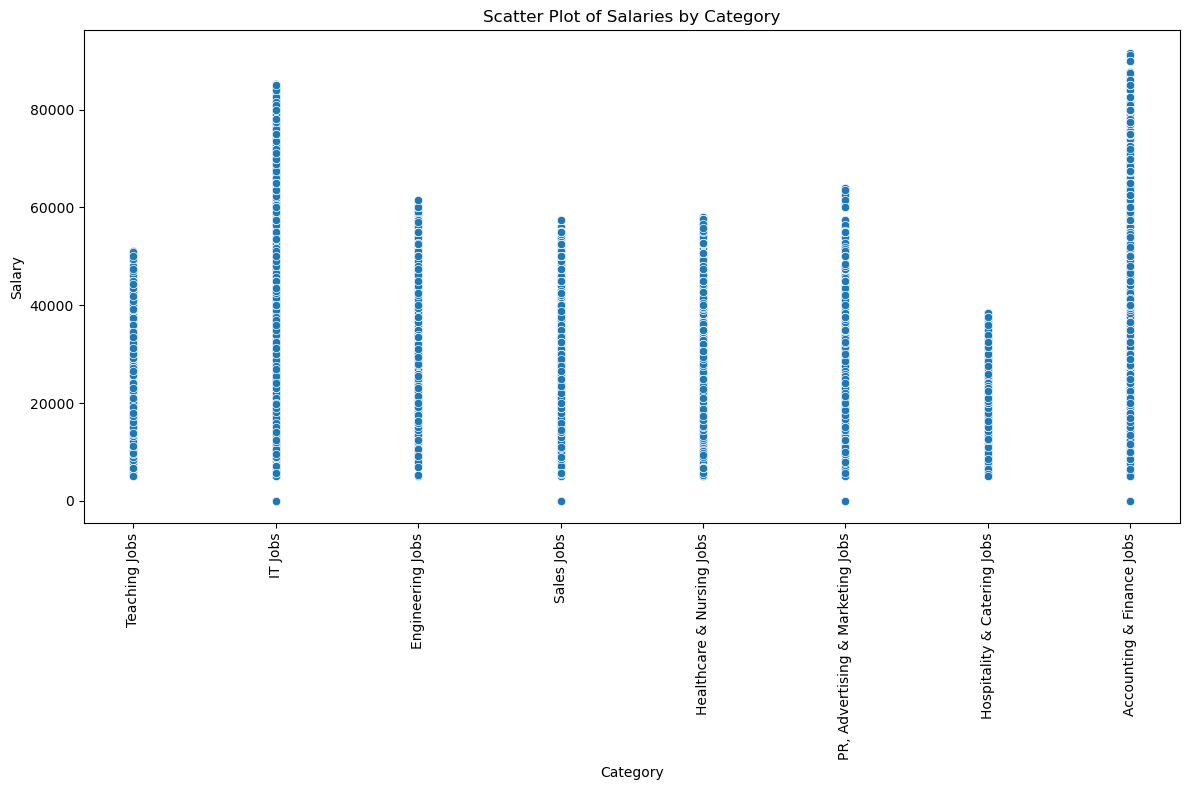

In [118]:
#I am plotting a scatter plot to show the outliers of different categories
plt.figure(figsize=(12,8))
sns.scatterplot(x='Category', y = 'Salary', data = dfjob)
#plt.yscale('log')
plt.xticks(rotation = 90)
plt.title('Scatter Plot of Salaries by Category')
plt.ylabel('Salary')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

In [119]:
#Error logging of the outliers:
salo = []
for i in dfjob.index:
    original = dfsallog.loc[i,'Salary']
    modified = dfjob.loc[i, 'Salary']        
    if original != modified:
            salo.append({'Index': i, 'Before Change': original, 'After Change': modified})
            reason = 'Changed ' + str(original) + ' to ' + str(modified) 
            updateErlist(i,'Salary',original,modified,'Outliers Values',reason) 
        
salodf = pd.DataFrame(salo)
print(salodf)

     Index  Before Change  After Change
0       79        90000.0      43596.70
1      286        59000.0      30715.74
2      661        96000.0      39750.24
3      818        60000.0      30715.74
4     1264        58560.0      30715.74
..     ...            ...           ...
708  50293        90000.0      43596.70
709  50300        93000.0      39750.24
710  50324        96000.0      39750.24
711  50614            0.0      30715.74
712  50679        59040.0      30715.74

[713 rows x 3 columns]


In [120]:
erlist.shape

(59885, 6)

In [121]:
erlist.tail()

indexOfdf ColumnName Original  Modified        ErrorType  \
59880     50293     Salary  90000.0   43596.7  Outliers Values   
59881     50300     Salary  93000.0  39750.24  Outliers Values   
59882     50324     Salary  96000.0  39750.24  Outliers Values   
59883     50614     Salary      0.0  30715.74  Outliers Values   
59884     50679     Salary  59040.0  30715.74  Outliers Values   

                            Fixing  
59880   Changed 90000.0 to 43596.7  
59881  Changed 93000.0 to 39750.24  
59882  Changed 96000.0 to 39750.24  
59883      Changed 0.0 to 30715.74  
59884  Changed 59040.0 to 30715.74

In [122]:
#Error loging of the type conversion to float
updateErlist('ALL','Salary','ObjectType','Float','Wrong Data Type','Converted the data type from object to float.')

In [123]:
erlist.tail()

indexOfdf ColumnName    Original  Modified        ErrorType  \
59881     50300     Salary     93000.0  39750.24  Outliers Values   
59882     50324     Salary     96000.0  39750.24  Outliers Values   
59883     50614     Salary         0.0  30715.74  Outliers Values   
59884     50679     Salary     59040.0  30715.74  Outliers Values   
59885       ALL     Salary  ObjectType     Float  Wrong Data Type   

                                              Fixing  
59881                    Changed 93000.0 to 39750.24  
59882                    Changed 96000.0 to 39750.24  
59883                        Changed 0.0 to 30715.74  
59884                    Changed 59040.0 to 30715.74  
59885  Converted the data type from object to float.

#### 9) Date Column

In [125]:
#Checking for the data format of open date type
dfjob['OpenDate'].dtype

dtype('O')

In [126]:
dfjob['OpenDate'].isnull().sum()

0

In [127]:
dfjob['OpenDate'] = dfjob['OpenDate'].str.strip()

In [128]:
#Checking for the data type format of close date type
dfjob['CloseDate'].dtype

dtype('O')

In [129]:
#In the below step after converting I am getting a missing value in the opendate column, so I am printing that ID here so to explain why I have dropped that row:
nl = dfjob[dfjob['Id'] == 70532534]
if not nl.empty:
    for i, r in nl.iterrows():
        print(r)

Id                                                       70532534
Title           Employed Financial Adviser – Access to profess...
Location                                                       Uk
Company                             Financialadviser careers .Com
ContractType                                        non-specified
ContractTime                                            permanent
Category                                Accounting & Finance Jobs
Salary                                                    35000.0
OpenDate                                          20131406T150000
CloseDate                                         20130813T150000
SourceName                                    ifaonlinejobs.co.uk
Name: 47819, dtype: object


In [130]:
#I am converting the column into respective datetime format as provided in the specification
datel = ["OpenDate", "CloseDate"]
for c in datel:
    dfjob[c] = pd.to_datetime(dfjob[c], format = '%Y-%m-%d %H:%M:%S', errors='coerce')

In [131]:
nl = dfjob[dfjob['OpenDate'].isnull()]
if not nl.empty:
    for i, r in nl.iterrows():
        print(r)

Id                              69747285
Title           Science Teacher  Sundays
Location                     West London
Company                  Trust Education
ContractType                   part_time
ContractTime               non-specified
Category                   Teaching Jobs
Salary                           25400.0
OpenDate                             NaT
CloseDate                            NaT
SourceName              cv-library.co.uk
Name: 0, dtype: object
Id                                 69022397
Title           IT Support/Rollout Engineer
Location                          Sheffield
Company                 Matchtech Group Plc
ContractType                  non-specified
ContractTime                       contract
Category                            IT Jobs
Salary                              14400.0
OpenDate                                NaT
CloseDate                               NaT
SourceName                 cv-library.co.uk
Name: 1, dtype: object
Id                 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Id                                  62380402
Title           Exchange / Wintel Specialist
Location                         Basingstoke
Company                 Matchtech Group plc.
ContractType                   non-specified
ContractTime                   non-specified
Category                    Engineering Jobs
Salary                               35000.0
OpenDate                                 NaT
CloseDate                                NaT
SourceName              rengineeringjobs.com
Name: 37590, dtype: object
Id                                        67944913
Title           CNC Miller ********ph Temp to perm
Location                                        Uk
Company                   The Dane Partnership Ltd
ContractType                         non-specified
ContractTime                             permanent
Category                          Engineering Jobs
Salary                                     24960.0
OpenDate                                       NaT
CloseDate          

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [132]:
#I have dropped the NA value because that data is showing the month value as 14 which is wrong, 
#I cannot change it to a random date, without proper discussion with a domain expert.
column_name = "OpenDate"
dfjob.dropna(subset=[column_name], inplace=True)

In [133]:
dfjob['OpenDate'].isnull().sum()

0

In [134]:
dfjob['OpenDate'].dtype

dtype('<M8[ns]')

In [135]:
dfjob['CloseDate'].dtype

dtype('<M8[ns]')

In [136]:
#Checking for violations
dfjob['violated'] = dfjob['OpenDate'] >= dfjob['CloseDate']
violations = dfjob[dfjob['violated']]
print(violations)

Empty DataFrame
Columns: [Id, Title, Location, Company, ContractType, ContractTime, Category, Salary, OpenDate, CloseDate, SourceName, violated]
Index: []


In [137]:
#Copying the data before converting to error log:
dfjobc = dfjob.copy()

In [138]:
# Check if CloseDate is less than or equal to OpenDate for each row and swap the same
ind = []
for i, r in dfjob.iterrows():
    if r['OpenDate'] > r['CloseDate']:
        print("Open Date:", r['OpenDate'], "Close Date:", r['CloseDate'])
        ind.append(i)
        dfjob.at[i,'OpenDate'], dfjob.at[i,'CloseDate'] = r['CloseDate'], r['OpenDate']
        print("Updated Open Date:", dfjob.at[i, 'OpenDate'], "Close Date:", dfjob.at[i, 'CloseDate'])

In [139]:
#Dropping the violated column:
dfjob.drop(columns = ['violated'], inplace= True)

In [140]:
#Error logging for OpenDate Type:
odate = []
for i in dfjob.index:
    original = dfjobc.loc[i,'OpenDate']
    modified = dfjob.loc[i, 'OpenDate']
    if original != modified:
        cttype.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) + "Swapped OpenDate and CloseDate"
        updateErlist(i,'OpenDate',original,modified,'Integrity Violation',reason) 
        
odatedf = pd.DataFrame(odate)

In [141]:
erlist.tail()

indexOfdf ColumnName    Original  Modified        ErrorType  \
59881     50300     Salary     93000.0  39750.24  Outliers Values   
59882     50324     Salary     96000.0  39750.24  Outliers Values   
59883     50614     Salary         0.0  30715.74  Outliers Values   
59884     50679     Salary     59040.0  30715.74  Outliers Values   
59885       ALL     Salary  ObjectType     Float  Wrong Data Type   

                                              Fixing  
59881                    Changed 93000.0 to 39750.24  
59882                    Changed 96000.0 to 39750.24  
59883                        Changed 0.0 to 30715.74  
59884                    Changed 59040.0 to 30715.74  
59885  Converted the data type from object to float.

In [142]:
erlist.shape

(59886, 6)

In [143]:
#Error logging for OpenDate Type:
cdate = []
for i in dfjob.index:
    original = dfjobc.loc[i,'CloseDate']
    modified = dfjob.loc[i, 'CloseDate']
    if original != modified:
        cttype.append({'Index': i, 'Before Change': original, 'After Change': modified})
        reason = 'Changed ' + str(original) + ' to ' + str(modified) + "Swapped OpenDate and CloseDate"
        updateErlist(i,'CloseDate',original,modified,'Integrity Violation',reason) 
        
cdatedf = pd.DataFrame(cdate)

In [144]:
erlist.shape

(59886, 6)

In [145]:
erlist.tail()

indexOfdf ColumnName    Original  Modified        ErrorType  \
59881     50300     Salary     93000.0  39750.24  Outliers Values   
59882     50324     Salary     96000.0  39750.24  Outliers Values   
59883     50614     Salary         0.0  30715.74  Outliers Values   
59884     50679     Salary     59040.0  30715.74  Outliers Values   
59885       ALL     Salary  ObjectType     Float  Wrong Data Type   

                                              Fixing  
59881                    Changed 93000.0 to 39750.24  
59882                    Changed 96000.0 to 39750.24  
59883                        Changed 0.0 to 30715.74  
59884                    Changed 59040.0 to 30715.74  
59885  Converted the data type from object to float.

In [146]:
#Converting the date format back after swapping because it gets converted to object after swapping.
datel = ["OpenDate", "CloseDate"]
for c in datel:
    dfjob[c] = pd.to_datetime(dfjob[c], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [147]:
#Error loging
updateErlist('ALL','OpenDate, CloseDate','ObjectType','DateTime','Wrong Data Type','Converted the data type to datetime')

In [148]:
erlist.tail()

indexOfdf           ColumnName    Original  Modified        ErrorType  \
59882     50324               Salary     96000.0  39750.24  Outliers Values   
59883     50614               Salary         0.0  30715.74  Outliers Values   
59884     50679               Salary     59040.0  30715.74  Outliers Values   
59885       ALL               Salary  ObjectType     Float  Wrong Data Type   
59886       ALL  OpenDate, CloseDate  ObjectType  DateTime  Wrong Data Type   

                                              Fixing  
59882                    Changed 96000.0 to 39750.24  
59883                        Changed 0.0 to 30715.74  
59884                    Changed 59040.0 to 30715.74  
59885  Converted the data type from object to float.  
59886            Converted the data type to datetime

#### 10) Source Column

In [150]:
dfjob['SourceName'].value_counts().tail(10)

Series([], Name: count, dtype: int64)

In [151]:
#I am checking for null values, in the source column
dfjob['SourceName'].isnull().sum()

0

......

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<s4017549>_dataset1_solution.csv
- \<s4017549\>_errorlist.csv

In [154]:
# code to save output data and error log
dfjob.to_csv('s4017549_dataset1_solution.csv', index=False)
erlist.to_csv('s4017549_errorlist.csv', index = False)

## Summary

The assessment was very challenging, I felt it gave me a very good understanding of how complex real time problems will be. I would like to thank the professors who put in the effort to design the assessment to cover all the concepts taught so far

## References

RMIT (no date) *week-5*, Rmit.instructure.com. Available at: https://rmit.instructure.com/courses/134429/pages/week-5-lab?module_item_id=5855604 (Accessed: 21 April 2024). 

RMIT (no date) *DataAuditing_Cleaning*, Rmit.instructure.com. Available at: https://rmit.instructure.com/courses/134429/files/35810639?module_item_id=5855606 (Accessed: 21 April 2024). 


Hasan.Ersan. (2021) *Detecting and handling outliers with pandas*, Medium. Available at: https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8 (Accessed: 23 April 2024). 